In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Choose a Kinematic Solver Type

Import CSV file as DataFrame. Drop the incomplete first loop with index -1

In [85]:
joint_positions_speed = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_094832')
joint_positions_distance = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_090327')
joint_positions_manipulator1 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_080501')
joint_positions_manipulator2 = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230120_160632')

l_of_jp = [joint_positions_speed, joint_positions_distance, joint_positions_manipulator1, joint_positions_manipulator2]

for jp in l_of_jp:
    jp.drop(jp.loc[jp['loop_count']==-1].index, inplace=True)

## IK solver type: Speed

In [86]:
s_mean = joint_positions_speed[joint_positions_speed.columns[3:]].mean()
s_std = joint_positions_speed[joint_positions_speed.columns[3:]].std()

## IK solver type: Distance

In [87]:
d_mean = joint_positions_distance[joint_positions_distance.columns[3:]].mean()
d_std = joint_positions_distance[joint_positions_distance.columns[3:]].std()

## IK solver type: Manipulator1

In [88]:
(joint_positions_manipulator1['loop_count'].min(), joint_positions_manipulator1['loop_count'].max())

(2, 165)

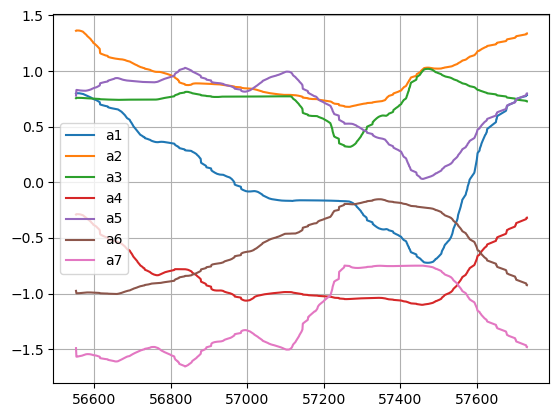

In [89]:
fig, ax = plt.subplots()
for joint in joint_positions_manipulator1.columns[3:]:
    ax.plot(joint_positions_manipulator1[joint].loc[joint_positions_manipulator1['loop_count']==35], label=joint)
#ax.plot(joint_positions['a1'], label='a1')
ax.legend()
ax.grid()

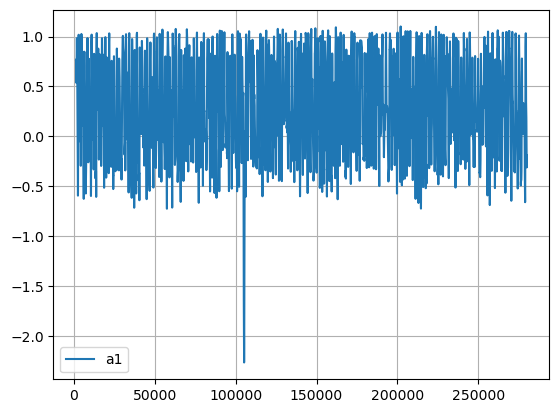

In [90]:
fig, ax = plt.subplots()
ax.plot(joint_positions_manipulator1['a1'], label='a1')
ax.legend()
ax.grid()

In [91]:
m1_mean = joint_positions_manipulator1[joint_positions_manipulator1.columns[3:]].mean()
m1_std = joint_positions_manipulator1[joint_positions_manipulator1.columns[3:]].std()

## IK solver type: Manipulator2

Range of the loops

In [92]:
(joint_positions_manipulator2['loop_count'].min(), joint_positions_manipulator2['loop_count'].max())

(61, 182)

Plot the joint angles

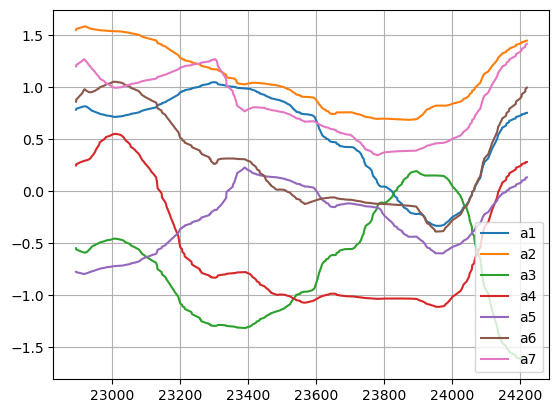

In [93]:
fig, ax = plt.subplots()
for joint in joint_positions_manipulator2.columns[3:]:
    ax.plot(joint_positions_manipulator2[joint].loc[joint_positions_manipulator2['loop_count']==75], label=joint)
#ax.plot(joint_positions['a1'], label='a1')
ax.legend()
ax.grid()

absolute values of joint angles

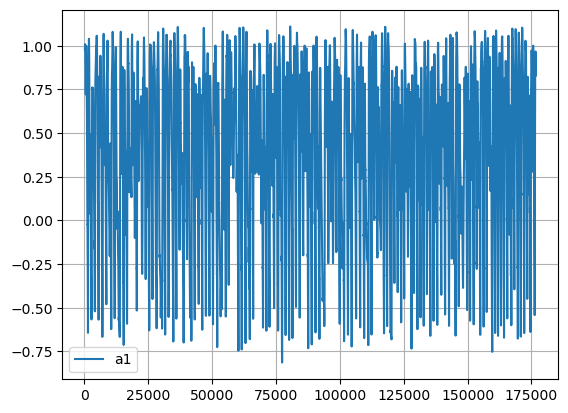

In [94]:
fig, ax = plt.subplots()
ax.plot(joint_positions_manipulator2['a1'], label='a1')
ax.legend()
ax.grid()

mean

In [95]:
m2_mean = joint_positions_manipulator2[joint_positions_manipulator2.columns[3:]].mean()
m2_std = joint_positions_manipulator2[joint_positions_manipulator2.columns[3:]].std()

## Results

In [96]:
r = {'speed_mean':s_mean, 'speed_std':s_std, 'distance_mean':d_mean, 'distance_std':d_std, 'manipulator1_mean':m1_mean, 'manipulator1_std':m1_std, 'manipulator2_mean':m2_mean, 'manipulator2_std':m2_std}
results = pd.concat(r, axis=1)
results

,speed_mean,speed_std,distance_mean,distance_std,manipulator1_mean,manipulator1_std,manipulator2_mean,manipulator2_std
a1,-0.393454,1.305677,0.061176,0.989919,0.301378,0.447856,0.395296,0.484671
a2,0.506344,1.047715,0.915152,0.760211,1.085121,0.278635,1.003355,0.224885
a3,0.150285,1.508087,0.453415,1.310912,-0.110943,0.671231,-0.189296,0.708768
a4,0.074533,0.845568,-0.248687,0.817918,-0.383849,0.693784,-0.685476,0.474235
a5,-0.162407,1.547136,-0.106131,1.298375,0.080124,0.605832,0.082773,0.594125
a6,0.035654,0.636868,0.051051,0.668554,0.051332,0.598569,-0.066305,0.498595
a7,-0.128475,1.437226,-0.165884,1.527451,0.039382,0.952229,0.081040,0.943457


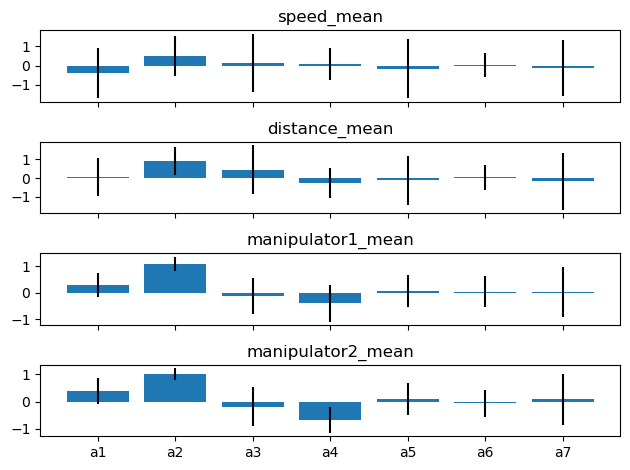

In [159]:
fix, axs = plt.subplots(4, sharex=True)
for plot, i in zip(range(4), range(0,7,2)):
    axs[plot].bar(range(7), results[results.columns[i]], yerr=results[results.columns[i+1]], tick_label=results.index )
    axs[plot].set_title(results.columns[i])

plt.tight_layout()

# Find the best route for a given Solver Type

In [182]:
joint_positions_manipulator1_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_105247')
joint_positions_manipulator1_long.drop(joint_positions_manipulator1_long.loc[joint_positions_manipulator1_long['loop_count']==-1].index, inplace=True)

In [218]:
joint_positions_manipulator2_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/position_values_20230123_152415')
joint_positions_manipulator2_long.drop(joint_positions_manipulator2_long.loc[joint_positions_manipulator2_long['loop_count']==-1].index, inplace=True)
new_df_pos = joint_positions_manipulator1_long.loc[(joint_positions_manipulator1_long['loop_count']==2, joint_positions_manipulator1_long.columns[3:])]
new_df.eval('abs(a1)+abs(a2)+abs(a3)+abs(a4)+abs(a5)+abs(a6)+abs(a7)')

3961    6.405129
3962    6.411003
3963    6.416849
3964    6.422671
3965    6.428518
          ...   
5618    6.360496
5619    6.366527
5620    6.372523
5621    6.490815
5622    6.497612
Length: 1662, dtype: float64

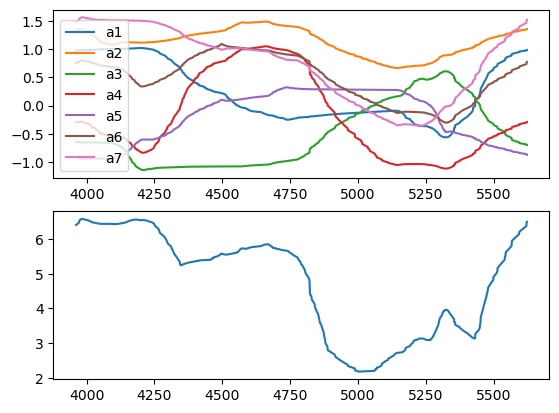

In [220]:
fig, axs = plt.subplots(2)
axs[0].plot(new_df_pos)
axs[0].legend(new_df_pos.columns)

axs[1].plot(new_df_pos.eval('abs(a1)+abs(a2)+abs(a3)+abs(a4)+abs(a5)+abs(a6)+abs(a7)'))

In [258]:
joint_velocity_manipulator1_long = pd.read_csv('/home/alexander/iiwa_stack_ws/src/iiwa_stack/iiwa_tesla/iiwa_tesla_data/velocity_values_20230123_105247')
joint_velocity_manipulator1_long.drop(joint_velocity_manipulator1_long.loc[joint_velocity_manipulator1_long['loop_count']==-1].index, inplace=True)
new_df_velo = joint_velocity_manipulator1_long.loc[(joint_velocity_manipulator1_long['loop_count']==0, joint_velocity_manipulator1_long.columns[3:])]
new_df_velo.eval('abs(a1)+abs(a2)+abs(a3)+abs(a4)+abs(a5)+abs(a6)+abs(a7)').mean()

2.0936213041440443

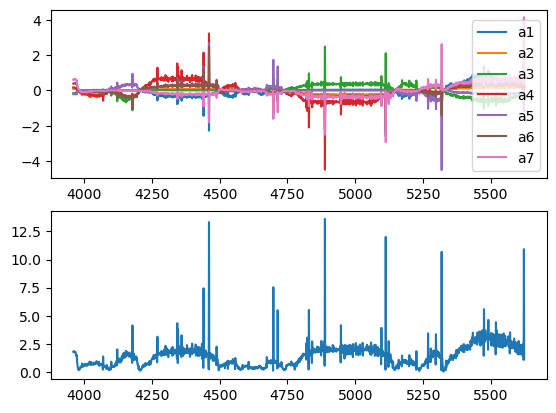

In [221]:
fig, axs = plt.subplots(2)
axs[0].plot(new_df_velo)
axs[0].legend(new_df_velo.columns)

axs[1].plot(new_df_velo.eval('abs(a1)+abs(a2)+abs(a3)+abs(a4)+abs(a5)+abs(a6)+abs(a7)'))

In [267]:
cycle_velocity_stats = pd.DataFrame(columns=['cycle','mean','std'])
for cycle in range(joint_velocity_manipulator1_long['loop_count'].min(), joint_velocity_manipulator1_long['loop_count'].max()):
    new_df = joint_velocity_manipulator1_long.loc[(joint_velocity_manipulator1_long['loop_count']==cycle, joint_velocity_manipulator1_long.columns[3:])]
    cycle_velocity_stats = pd.concat([cycle_velocity_stats, pd.DataFrame(data={'cycle':cycle, 'mean':new_df.eval('abs(a1)+abs(a2)+abs(a3)+abs(a4)+abs(a5)+abs(a6)+abs(a7)').mean(), 'std':new_df.eval('abs(a1)+abs(a2)+abs(a3)+abs(a4)+abs(a5)+abs(a6)+abs(a7)').std()}, index=[cycle])], ignore_index=True)

cycle_velocity_stats

,cycle,mean,std
0,0,2.093621,1.778168
1,1,1.763220,1.690822
2,2,1.448939,1.042523
3,3,1.661726,1.345546
4,4,1.553114,1.611885
...,...,...,...
301,301,1.392467,1.332006
302,302,1.803590,2.466098
303,303,1.382883,1.250008
304,304,1.643185,1.717885


In [314]:
best_cycle = joint_positions_manipulator1_long.loc[joint_positions_manipulator1_long['loop_count']==cycle_velocity_stats[cycle_velocity_stats['mean']==cycle_velocity_stats['mean'].min()]['cycle'].index[0]]

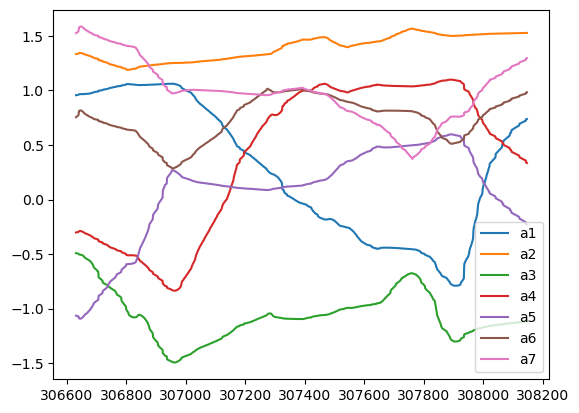

In [323]:
fig, axs = plt.subplots()
axs.plot(best_cycle[best_cycle.columns[3:]])
axs.legend(best_cycle.columns[3:])